::# **New York City Yellow Taxi Data.  Shilpa Deshmukh**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

# Try loading one file

df = pd.read_parquet('/content/trip_records/2023-1.parquet')
df.info()
df.head()

In [ ]:
#befoe uploading add the coment in code

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
# trying to find the current directory
print("Curr Directory : ",os.getcwd())

# Select the folder having data files
os.chdir('/content/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        ##print(file_path + file_name)
        current_df = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        current_df.tpep_pickup_datetime = pd.to_datetime(current_df.tpep_pickup_datetime)
        current_df.tpep_dropoff_datetime = pd.to_datetime(current_df.tpep_dropoff_datetime)
        current_df['pickup_date'] = current_df['tpep_pickup_datetime'].dt.date
        current_df['pickup_hour'] = current_df['tpep_pickup_datetime'].dt.hour

            # Iterate through each hour of the selected date
        for curr_date, curr_hour_df in current_df.groupby('pickup_date'):
                # Sample 5% of the hourly data randomly
           sample = curr_hour_df.sample(frac=0.075,random_state=42)
                # add data of this hour to the dataframe
           sampled_data=pd.concat([sampled_data,sample])


        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])
        # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Curr Directory :  /content


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

# Store the df in csv/parquet
df.to_csv('7_5_percent_data.csv')

In [ ]:
df.to_csv('7_5_persent_data.csv')

NameError: name 'df' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file

df = pd.read_csv('/content/trip_records/7_5_persent_data.csv')

In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,837,2,2023-10-31 22:24:59,2023-10-31 22:35:21,3.0,1.35,1.0,N,170,230,...,0.5,3.14,0.00,1.0,18.84,2.5,0.00,2023-10-31,22,NaN
1,1525,2,2023-10-31 23:59:41,2023-11-01 00:13:51,1.0,4.49,1.0,N,48,24,...,0.5,2.00,0.00,1.0,28.20,2.5,0.00,2023-10-31,23,NaN
2,63088,1,2023-11-01 16:04:55,2023-11-01 16:08:37,1.0,0.60,1.0,N,142,239,...,0.5,2.00,0.00,1.0,14.30,2.5,0.00,2023-11-01,16,NaN
3,61694,2,2023-11-01 16:57:12,2023-11-01 18:18:17,2.0,18.93,2.0,N,132,230,...,0.5,10.00,6.94,1.0,97.69,2.5,1.75,2023-11-01,16,NaN
4,89590,2,2023-11-01 19:51:16,2023-11-01 19:54:26,1.0,0.84,1.0,N,142,237,...,0.5,3.90,0.00,1.0,16.90,2.5,0.00,2023-11-01,19,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844637 entries, 0 to 2844636
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
 20  pickup_date            object 
 21  pickup_hour            int64  
 22  airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.drop(['Unnamed: 0'],axis=1,inplace=True)
#df.drop(['tpep_pickup_datetime'],axis=1,inplace=True)
#df.drop(['tpep_dropoff_datetime'],axis=1,inplace=True)
#df.drop(['pickup_date'],axis=1,inplace=True)
#df.drop(['pickup_hour'],axis=1,inplace=True
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,2,2023-10-31 22:24:59,2023-10-31 22:35:21,3.0,1.35,1.0,N,170,230,1,...,0.5,3.14,0.00,1.0,18.84,2.5,0.00,2023-10-31,22,NaN
1,2,2023-10-31 23:59:41,2023-11-01 00:13:51,1.0,4.49,1.0,N,48,24,1,...,0.5,2.00,0.00,1.0,28.20,2.5,0.00,2023-10-31,23,NaN
2,1,2023-11-01 16:04:55,2023-11-01 16:08:37,1.0,0.60,1.0,N,142,239,1,...,0.5,2.00,0.00,1.0,14.30,2.5,0.00,2023-11-01,16,NaN
3,2,2023-11-01 16:57:12,2023-11-01 18:18:17,2.0,18.93,2.0,N,132,230,1,...,0.5,10.00,6.94,1.0,97.69,2.5,1.75,2023-11-01,16,NaN
4,2,2023-11-01 19:51:16,2023-11-01 19:54:26,1.0,0.84,1.0,N,142,237,1,...,0.5,3.90,0.00,1.0,16.90,2.5,0.00,2023-11-01,19,NaN


In [ ]:
df['tpep_dropoff_datetime'].unique()

array(['2023-10-31 22:35:21', '2023-11-01 00:13:51',
       '2023-11-01 16:08:37', ..., '2023-03-01 13:23:49',
       '2023-03-01 16:20:44', '2023-03-06 12:23:30'], dtype=object)

In [ ]:
df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,2595391
2.0,108474
99.0,16260
5.0,15828
3.0,9362
4.0,5694
6.0,6


In [ ]:
#the valid ratecodeID is 1 to 6. fixing the value 99 by replacing it with nan.
df.loc[df['RatecodeID']==99]
df['RatecodeID']= df['RatecodeID'].replace(99,np.nan)

df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,2595391
2.0,108474
5.0,15828
3.0,9362
4.0,5694
6.0,6


In [ ]:
df.RatecodeID.unique()

array([ 1.,  2., nan,  4.,  5.,  3.,  6.])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

#df.Airport_fee.value_counts()

df.Airport_fee.unique()


array([ 0.  ,  1.75,   nan, -1.75,  1.25, -1.25])

In [ ]:
#df.airport_fee.value_counts()
df.airport_fee.unique()

array([  nan,  1.25,  0.  , -1.25])

In [ ]:
df.Airport_fee.fillna(0,inplace=True)
df.airport_fee.fillna(0,inplace=True)

In [ ]:
df.Airport_fee.unique()

array([ 0.  ,  1.75, -1.75,  1.25, -1.25])

In [ ]:
df.airport_fee.unique()

array([ 0.  ,  1.25, -1.25])

In [ ]:
#combine tow Airprt colimn and airport column whihc are same .

if (df['Airport_fee']).equals(df['airport_fee']):
  df['Airport_fee']=df['airport_fee']
else:
  df['Airport_fee']=df['Airport_fee']+df['airport_fee']


In [ ]:

df.airport_fee.unique()

array([ 0.  ,  1.25, -1.25])

In [ ]:
df.Airport_fee.unique()

array([ 0.  ,  1.75, -1.75,  1.25, -1.25])

In [ ]:
df.drop(['airport_fee'],axis=1,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour
0,837,2,2023-10-31 22:24:59,2023-10-31 22:35:21,3.0,1.35,1.0,N,170,230,...,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.00,2023-10-31,22
1,1525,2,2023-10-31 23:59:41,2023-11-01 00:13:51,1.0,4.49,1.0,N,48,24,...,1.0,0.5,2.00,0.00,1.0,28.20,2.5,0.00,2023-10-31,23
2,63088,1,2023-11-01 16:04:55,2023-11-01 16:08:37,1.0,0.60,1.0,N,142,239,...,5.0,0.5,2.00,0.00,1.0,14.30,2.5,0.00,2023-11-01,16
3,61694,2,2023-11-01 16:57:12,2023-11-01 18:18:17,2.0,18.93,2.0,N,132,230,...,5.0,0.5,10.00,6.94,1.0,97.69,2.5,1.75,2023-11-01,16
4,89590,2,2023-11-01 19:51:16,2023-11-01 19:54:26,1.0,0.84,1.0,N,142,237,...,2.5,0.5,3.90,0.00,1.0,16.90,2.5,0.00,2023-11-01,19


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

if (df['fare_amount'] < 0).any() :
  print('fare_amount has negative values')
else:
  print('fare_amount has positvie value')

fare_amount has positvie value


In [ ]:
df['fare_amount'].value_counts()

,count
fare_amount,
8.60,126030
9.30,124668
10.00,123303
7.90,122351
10.70,118590
...,...
59.23,1
52.66,1
1.15,1


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

negatvie_fareamount = df.loc[df['fare_amount'] < 0]
negatvie_fareamount

# there is no negative value of fare amount.


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour


In [ ]:
# Find which columns have negative values

negative_columns = []
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
   if (df[col] < 0).any():
     negative_columns.append(col)
negative_columns

[]

In [ ]:
# fix these negative values

for col in negative_columns:
  df[col]= df[col].abs()

#df['extra'].value_counts()/df.shape[0]*100


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

df.isna().sum()

,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,93622
trip_distance,0
RatecodeID,109882
store_and_fwd_flag,93622
PULocationID,0
DOLocationID,0


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
df[df['passenger_count'].isna()]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour
14,3210566,1,2023-11-01 17:52:13,2023-11-01 18:45:40,NaN,0.00,NaN,NaN,91,122,...,0.0,0.5,0.00,0.0,1.0,62.65,NaN,0.0,2023-11-01,17
41,3210301,2,2023-11-01 16:14:00,2023-11-01 16:38:00,NaN,6.61,NaN,NaN,95,138,...,0.0,0.5,3.72,0.0,1.0,28.55,NaN,0.0,2023-11-01,16
70,3211061,1,2023-11-01 19:21:18,2023-11-01 19:29:50,NaN,0.00,NaN,NaN,164,186,...,0.0,0.5,0.00,0.0,1.0,14.95,NaN,0.0,2023-11-01,19
72,3212669,1,2023-11-01 23:03:50,2023-11-01 23:12:34,NaN,0.00,NaN,NaN,163,48,...,0.0,0.5,0.00,0.0,1.0,13.23,NaN,0.0,2023-11-01,23
73,3209472,2,2023-11-01 10:13:31,2023-11-01 10:30:04,NaN,1.41,NaN,NaN,249,114,...,0.0,0.5,3.01,0.0,1.0,23.10,NaN,0.0,2023-11-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844424,2912176,2,2023-02-28 09:05:33,2023-02-28 09:18:06,NaN,1.91,NaN,NaN,238,75,...,0.0,0.5,1.00,0.0,1.0,19.74,NaN,0.0,2023-02-28,9
2844460,2911923,2,2023-02-28 08:46:52,2023-02-28 09:02:12,NaN,1.90,NaN,NaN,75,238,...,0.0,0.5,3.97,0.0,1.0,23.83,NaN,0.0,2023-02-28,8
2844532,2913261,2,2023-02-28 18:38:42,2023-02-28 18:56:45,NaN,4.26,NaN,NaN,246,262,...,0.0,0.5,2.61,0.0,1.0,28.73,NaN,0.0,2023-02-28,18
2844597,2912334,1,2023-02-28 11:37:45,2023-02-28 11:54:12,NaN,2.00,NaN,NaN,236,161,...,0.0,0.5,1.96,0.0,1.0,21.56,NaN,0.0,2023-02-28,11


In [ ]:

# Impute NaN values in 'passenger_count' with mode
passenger_count_mode = df['passenger_count'].mode()[0]
df['passenger_count'].fillna(passenger_count_mode, inplace=True)


In [ ]:
df[df['passenger_count'].isnull()]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour


Did you find zeroes in passenger_count? Handle these.

In [ ]:
df['passenger_count'].value_counts()

,count
passenger_count,
1.0,2162804
2.0,416036
3.0,103390
4.0,58610
0.0,43537
5.0,36367
6.0,23852
8.0,25
7.0,8


NO zeroes in passenger count

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df[df['RatecodeID'].isna()]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour
14,3210566,1,2023-11-01 17:52:13,2023-11-01 18:45:40,1.0,0.00,NaN,NaN,91,122,...,0.0,0.5,0.00,0.00,1.0,62.65,NaN,0.0,2023-11-01,17
41,3210301,2,2023-11-01 16:14:00,2023-11-01 16:38:00,1.0,6.61,NaN,NaN,95,138,...,0.0,0.5,3.72,0.00,1.0,28.55,NaN,0.0,2023-11-01,16
53,47964,1,2023-11-01 13:34:34,2023-11-01 14:42:31,1.0,13.90,NaN,N,241,209,...,0.0,0.5,0.00,0.00,1.0,48.00,0.0,0.0,2023-11-01,13
70,3211061,1,2023-11-01 19:21:18,2023-11-01 19:29:50,1.0,0.00,NaN,NaN,164,186,...,0.0,0.5,0.00,0.00,1.0,14.95,NaN,0.0,2023-11-01,19
72,3212669,1,2023-11-01 23:03:50,2023-11-01 23:12:34,1.0,0.00,NaN,NaN,163,48,...,0.0,0.5,0.00,0.00,1.0,13.23,NaN,0.0,2023-11-01,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844460,2911923,2,2023-02-28 08:46:52,2023-02-28 09:02:12,1.0,1.90,NaN,NaN,75,238,...,0.0,0.5,3.97,0.00,1.0,23.83,NaN,0.0,2023-02-28,8
2844463,2796782,1,2023-02-28 16:06:24,2023-02-28 17:06:27,1.0,18.60,NaN,N,197,240,...,0.0,0.5,0.00,6.55,1.0,65.25,0.0,0.0,2023-02-28,16
2844532,2913261,2,2023-02-28 18:38:42,2023-02-28 18:56:45,1.0,4.26,NaN,NaN,246,262,...,0.0,0.5,2.61,0.00,1.0,28.73,NaN,0.0,2023-02-28,18
2844597,2912334,1,2023-02-28 11:37:45,2023-02-28 11:54:12,1.0,2.00,NaN,NaN,236,161,...,0.0,0.5,1.96,0.00,1.0,21.56,NaN,0.0,2023-02-28,11


In [ ]:
df.RatecodeID.describe()

,RatecodeID
count,2.734755e+06
mean,1.075920e+00
std,3.987377e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,6.000000e+00


In [ ]:
df.RatecodeID.value_counts()

,count
RatecodeID,
1.0,2595391
2.0,108474
5.0,15828
3.0,9362
4.0,5694
6.0,6


In [ ]:
df.RatecodeID.median()

1.0

In [ ]:
#replacing the NAN values in RatecodeID with 1 as its the standard rate also its the mode as well

df['RatecodeID'].fillna(df.RatecodeID.median(),inplace=True)

In [ ]:
df[df['RatecodeID'].isna()]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].describe()


,congestion_surcharge
count,2.751015e+06
mean,2.308140e+00
std,6.654612e-01
min,0.000000e+00
25%,2.500000e+00
50%,2.500000e+00
75%,2.500000e+00
max,2.500000e+00


In [ ]:
# replacing NAN with the mean value
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mean(), inplace=True)

In [ ]:
df['congestion_surcharge'].isna().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

there are no missing values in any other column

In [ ]:
# Handle any remaining missing values

df.isna().sum()

,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,93622
PULocationID,0
DOLocationID,0


In [ ]:
# the store and fwd flag doesnot add any value to the datset analusis so deleting it.
df.drop(['store_and_fwd_flag'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0




> Add blockquote



### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844637 entries, 0 to 2844636
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
 19  pickup_date            object 
 20  pickup_hour            int64  
dtypes: float64(12), int64(6), object(3)
memory usage: 455.

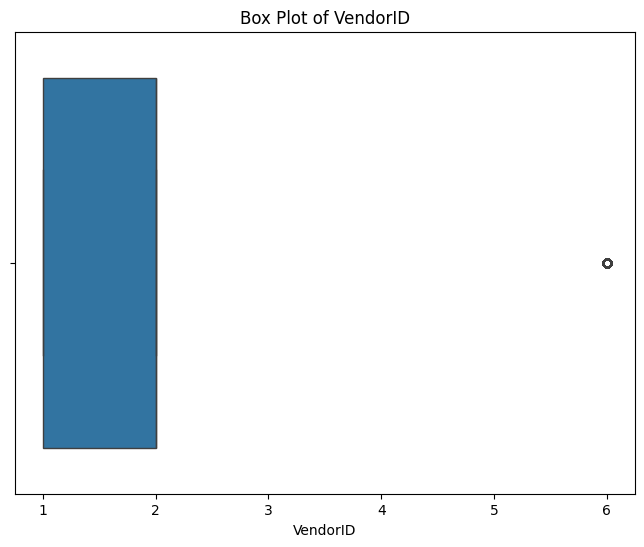

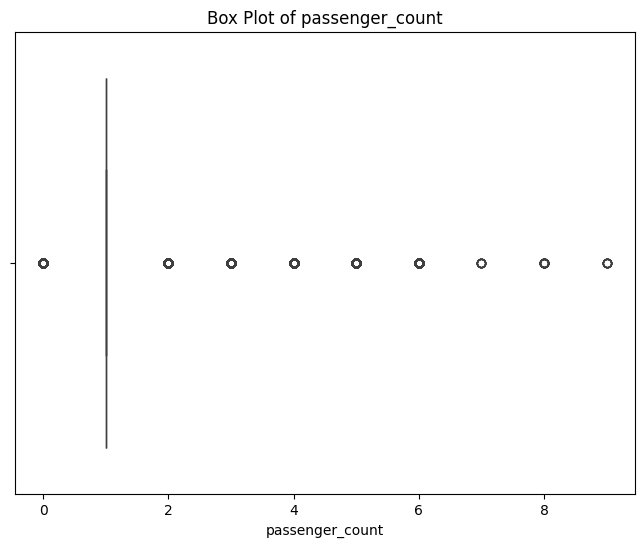

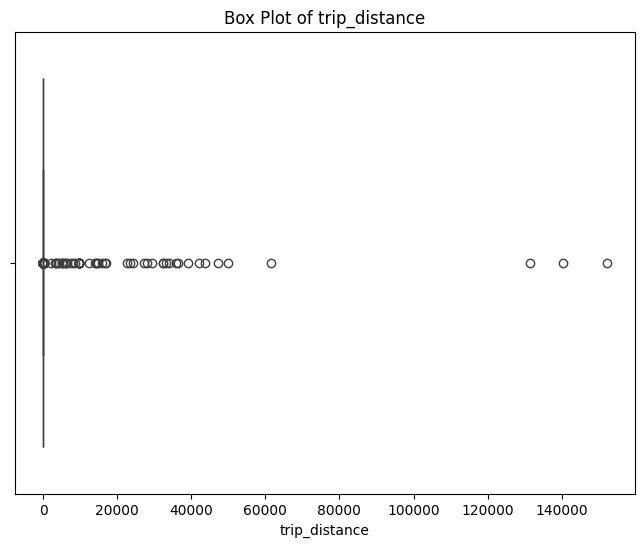

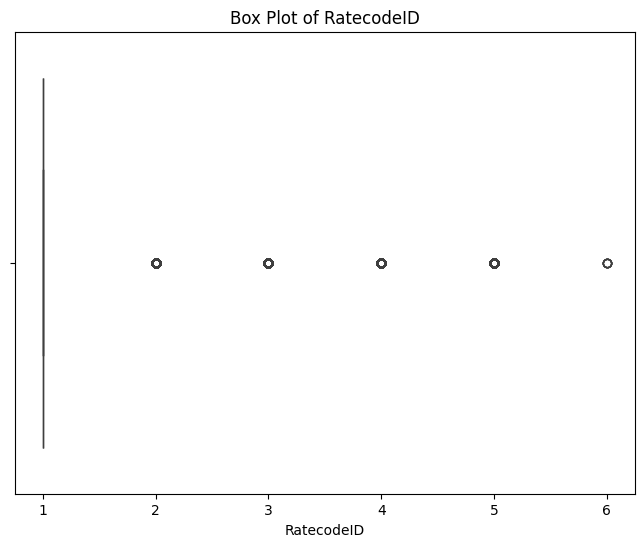

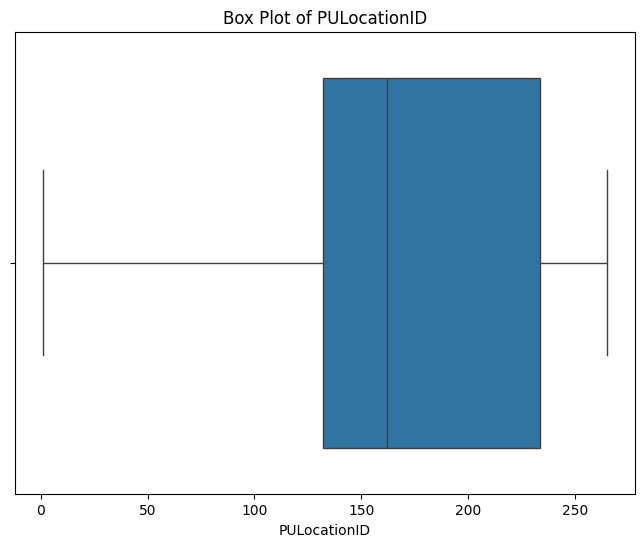

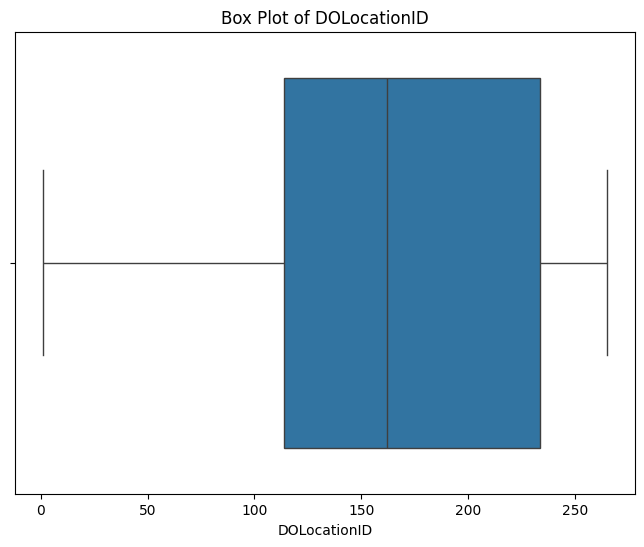

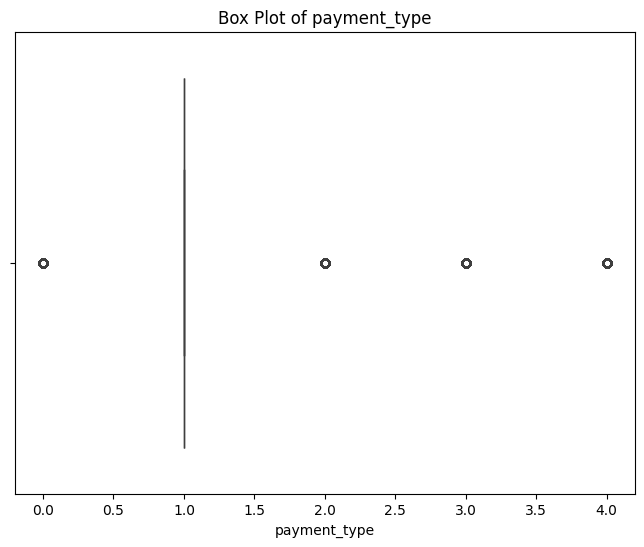

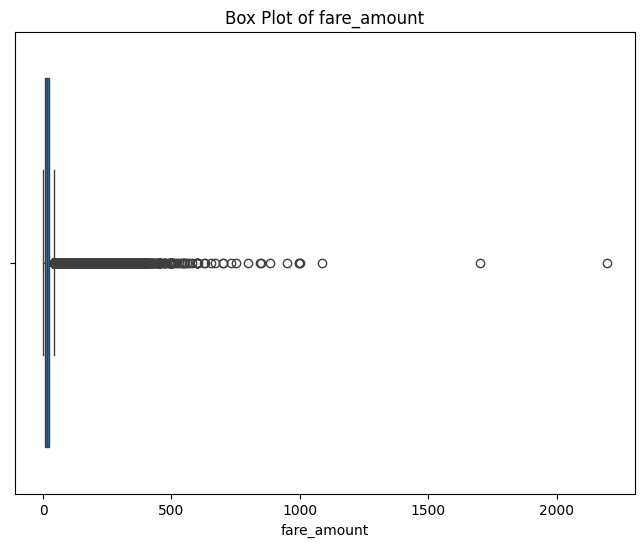

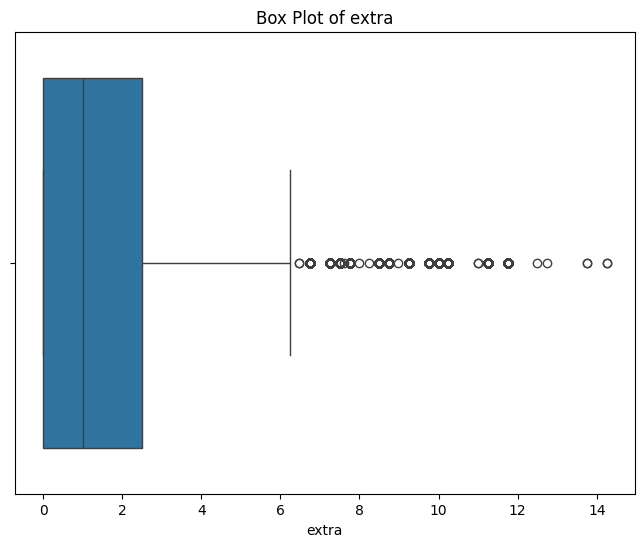

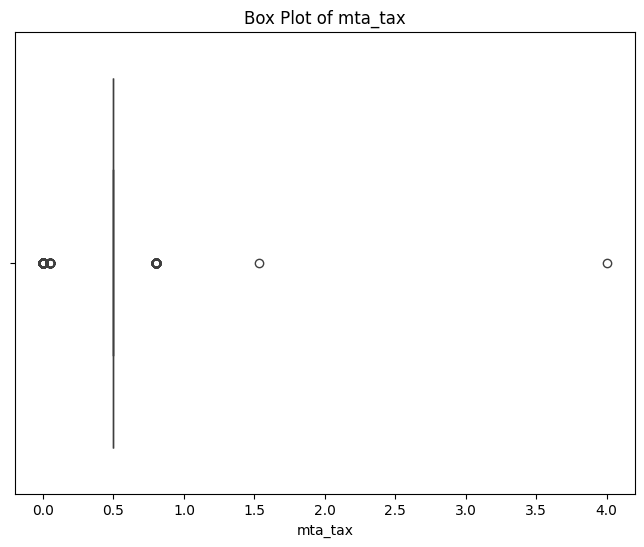

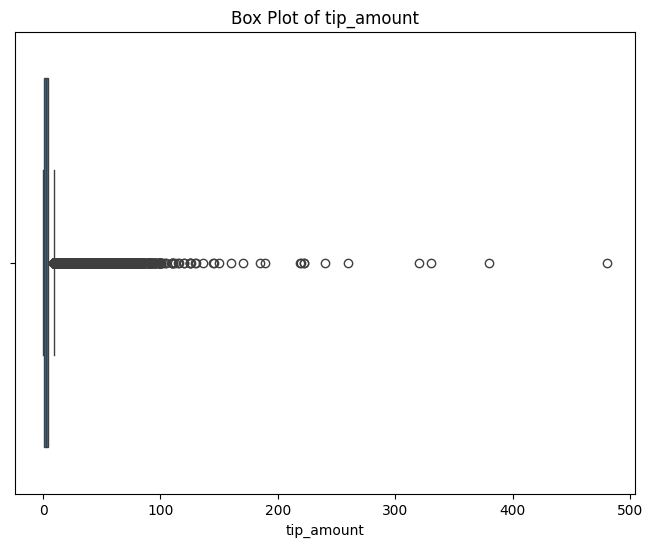

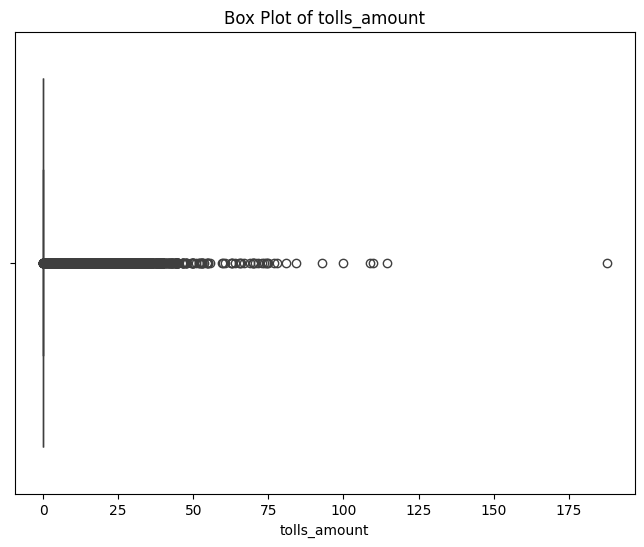

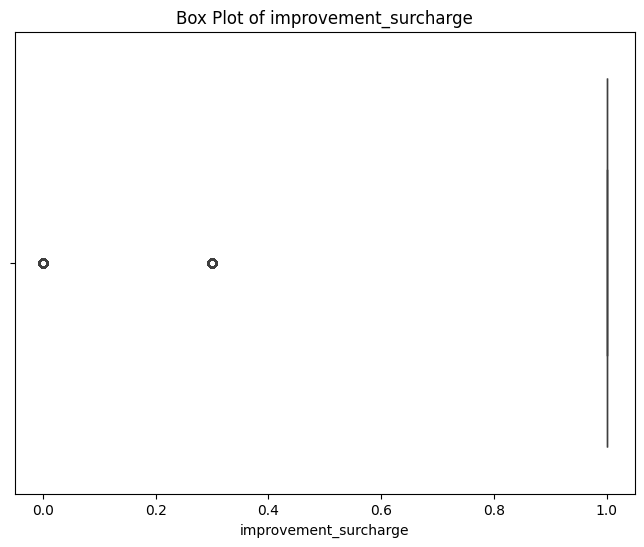

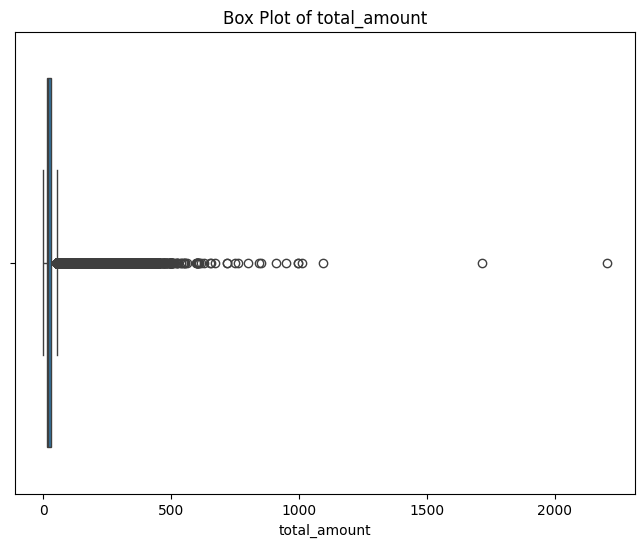

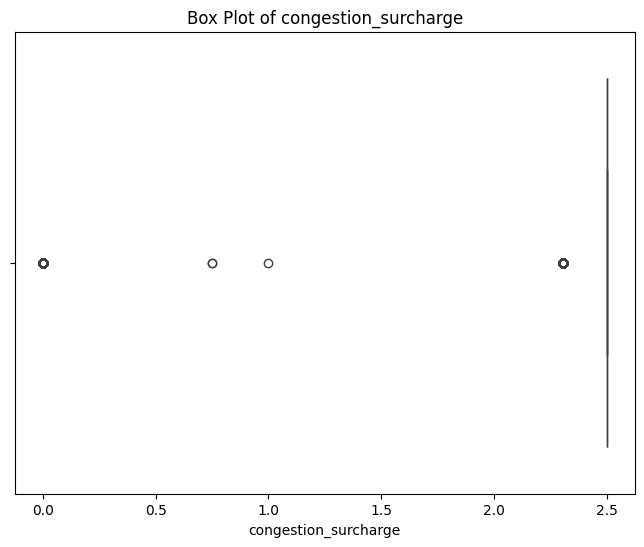

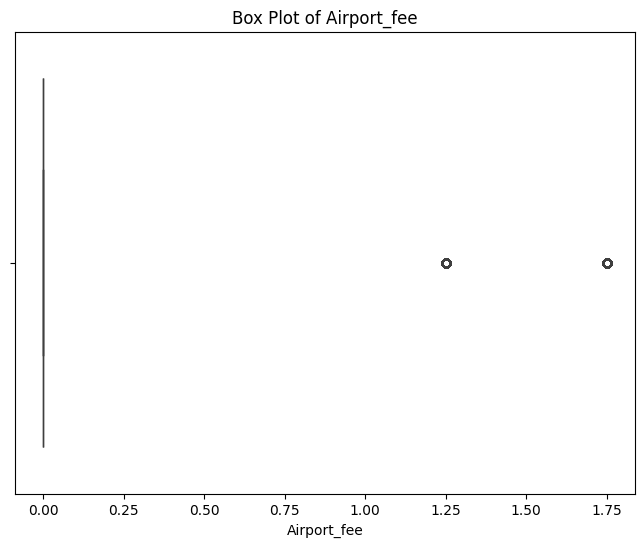

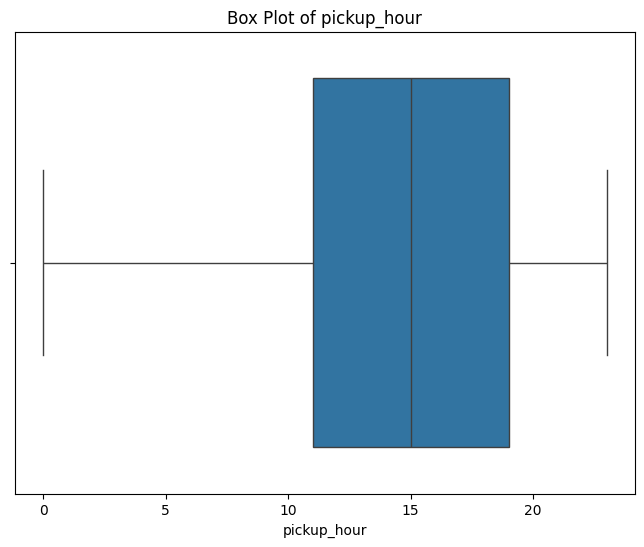

In [ ]:

# Box Plots for Numerical Columns
numerical_columns = df.select_dtypes(include=np.number).columns  # Get numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6
df = df.loc[df['passenger_count'] <= 6]
df['passenger_count'].value_counts()


,count
passenger_count,
1.0,2162804
2.0,416036
3.0,103390
4.0,58610
0.0,43537
5.0,36367
6.0,23852


In [29]:
# Continue with outlier handling
df.trip_distance.describe()


,trip_distance
count,2.844596e+06
mean,3.940587e+00
std,1.761676e+02
min,0.000000e+00
25%,1.050000e+00
50%,1.800000e+00
75%,3.400000e+00
max,1.521363e+05


In [30]:
if((df['trip_distance']==0) & (df['fare_amount'] >300)).any():
   newdf = df.loc[(df['trip_distance']!=0) | (df['fare_amount'] <=300)]


In [31]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
 #(both distance and fare should not be zero for different zones)

error_entries = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) &
                         (df['PULocationID'] != df['DOLocationID'])]

print(f"Number of error entries: {len(error_entries)}")

#remove the error entries  from original dataset.
df = df[~df.index.isin(error_entries.index)]


Number of error entries: 114


In [32]:
#checking if the error entries are present or not
df[df.index.isin(error_entries.index)].value_counts()

,,,,,,,,,,,,,,,,,,,,count
VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,


In [ ]:
# Do any columns need standardising?
#Standardizing certain columns in the NYC taxi trip data,
# such as those related to distances, fares, and durations, can be beneficial for
#certain machine learning algorithms, particularly those sensitive to feature scales.
# This helps to improve algorithm performance, ensure fair feature comparison, and enhance
#interpretability.


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [33]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical




The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

all these are NUmberical as these all are monetary values which represenataion some kind of fee or money which can be of continuus value for some maybe in fixed range. you can perfoam Artitimatic operatio on these. they can be ued for quatative analysis.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

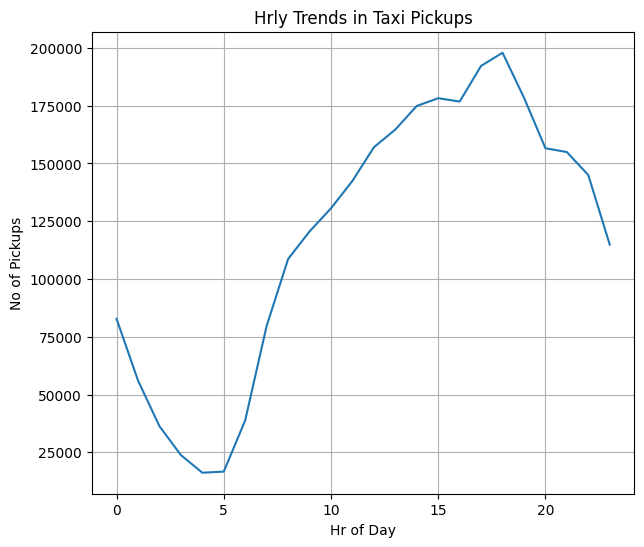

In [34]:
 # Find and show the hourly trends in taxi pickups

# Hourly trends in taxi pickups
hrly_trends = df.groupby('pickup_hour')['pickup_hour'].count()
plt.figure(figsize=(7, 6))
sns.lineplot(x=hrly_trends.index, y=hrly_trends.values)
plt.xlabel('Hr of Day')
plt.ylabel('No of Pickups')
plt.title('Hrly Trends in Taxi Pickups')
plt.grid(True)
plt.show()


* The no. of pickups are highest between 16-18hrs and lowest between 4-5hrs.

In [35]:
#Find and show the daily trends in taxi pickups (days of the week)
# Converting tpep_pickup_datetime'to datetime type.
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()


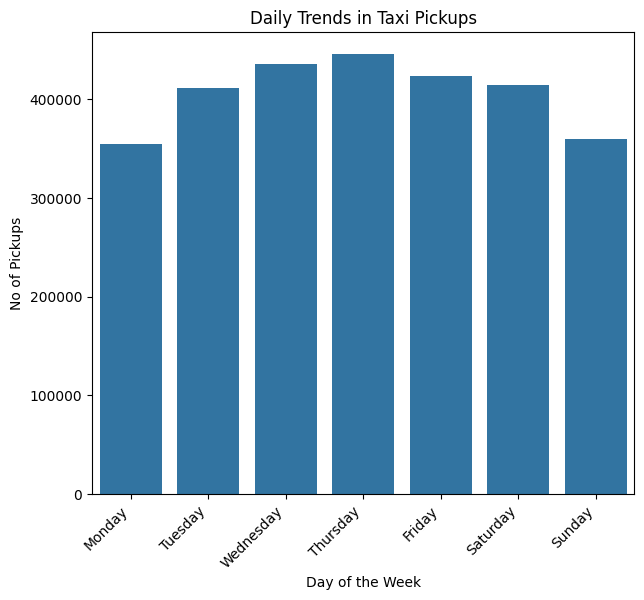

In [36]:
#groups the data by the pickup_day column and counts the occurrences of each day,
#storing the result in daily_trends.
daily_trends = df.groupby('pickup_day')['pickup_day'].count()
# Reorder the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trends = daily_trends.reindex(day_order)

plt.figure(figsize=(7, 6))
sns.barplot(x=daily_trends.index, y=daily_trends.values)
plt.xlabel('Day of the Week')
plt.ylabel('No of Pickups')
#plt.grid(True)
plt.title('Daily Trends in Taxi Pickups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Show the monthly trends in pickups

df['pick_up_month'] = df['tpep_pickup_datetime'].dt.month_name()

Text(0.5, 1.0, 'Monthly Trends in Taxi Pickups')

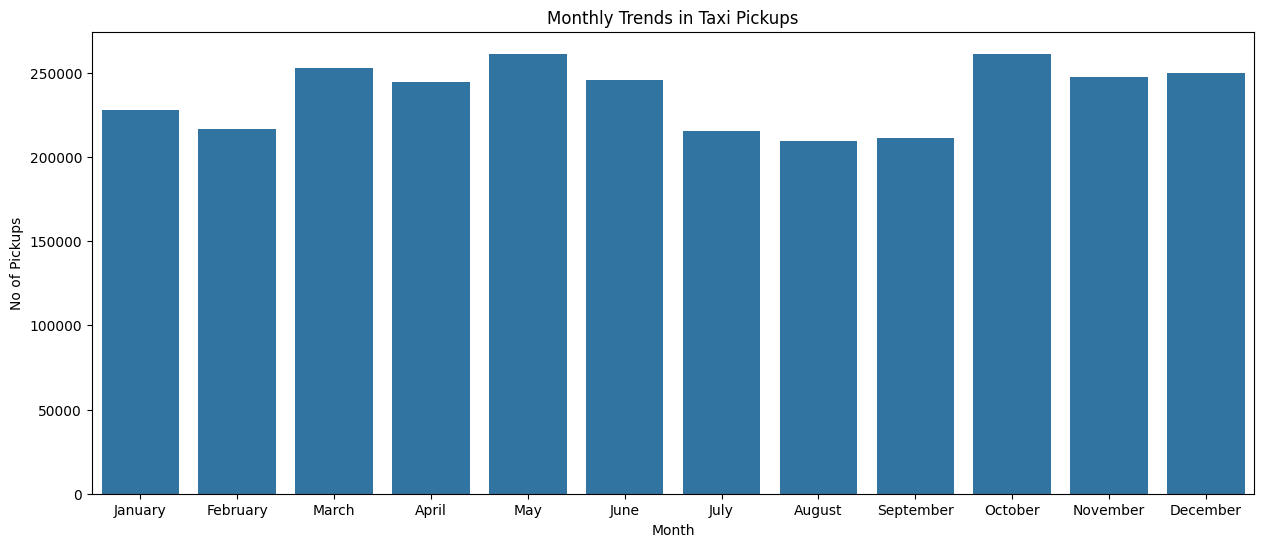

In [ ]:
monthly_trends = df.groupby('pick_up_month')['pick_up_month'].count()
#reorder the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trends = monthly_trends.reindex(month_order)

plt.figure(figsize=(15, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values)
plt.xlabel('Month')
plt.ylabel('No of Pickups')
plt.title('Monthly Trends in Taxi Pickups')

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [37]:
# Analyse the above parameters

# Check for zero values
zero_fare = (df['fare_amount'] == 0).sum()
zero_tip = (df['tip_amount'] == 0).sum()
zero_total = (df['total_amount'] == 0).sum()
zero_distance = (df['trip_distance'] == 0).sum()

print(f"Zero fare_amount: {zero_fare}")
print(f"Zero tip_amount: {zero_tip}")
print(f"Zero total_amount: {zero_total}")
print(f"Zero trip_distance: {zero_distance}")



Zero fare_amount: 932
Zero tip_amount: 653524
Zero total_amount: 376
Zero trip_distance: 54051


In [38]:
# Check for negative values
negative_fare = (df['fare_amount'] < 0).sum()
negative_tip = (df['tip_amount'] < 0).sum()
negative_total = (df['total_amount'] < 0).sum()
negative_distance = (df['trip_distance'] < 0).sum()

print(f"Negative fare_amount: {negative_fare}")
print(f"Negative tip_amount: {negative_tip}")
print(f"Negative total_amount: {negative_total}")
print(f"Negative trip_distance: {negative_distance}")


Negative fare_amount: 0
Negative tip_amount: 0
Negative total_amount: 0
Negative trip_distance: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

yes it would be beneficial to leave out zero values

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [39]:
# Create a df with non zero entries for the selected parameters.
final_df_without_zero = df.loc[(df['fare_amount'] != 0) & (df['tip_amount'] != 0) & (df['total_amount'] != 0) & (df['trip_distance'] != 0)]
final_df_without_zero.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,pickup_day
0,2,2023-10-31 22:24:59,2023-10-31 22:35:21,3.0,1.35,1.0,170,230,1,10.7,...,0.5,3.14,0.00,1.0,18.84,2.5,0.00,2023-10-31,22,Tuesday
1,2,2023-10-31 23:59:41,2023-11-01 00:13:51,1.0,4.49,1.0,48,24,1,21.2,...,0.5,2.00,0.00,1.0,28.20,2.5,0.00,2023-10-31,23,Tuesday
2,1,2023-11-01 16:04:55,2023-11-01 16:08:37,1.0,0.60,1.0,142,239,1,5.8,...,0.5,2.00,0.00,1.0,14.30,2.5,0.00,2023-11-01,16,Wednesday
3,2,2023-11-01 16:57:12,2023-11-01 18:18:17,2.0,18.93,2.0,132,230,1,70.0,...,0.5,10.00,6.94,1.0,97.69,2.5,1.75,2023-11-01,16,Wednesday
4,2,2023-11-01 19:51:16,2023-11-01 19:54:26,1.0,0.84,1.0,142,237,1,6.5,...,0.5,3.90,0.00,1.0,16.90,2.5,0.00,2023-11-01,19,Wednesday


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [41]:
# Group data by month and analyse monthly revenue
# Ensure 'pick_up_month' column is created
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']) # Convert to datetime if needed
df['pick_up_month'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = df.groupby('pick_up_month')['total_amount'].sum()
# Reorder the months for better visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(month_order)

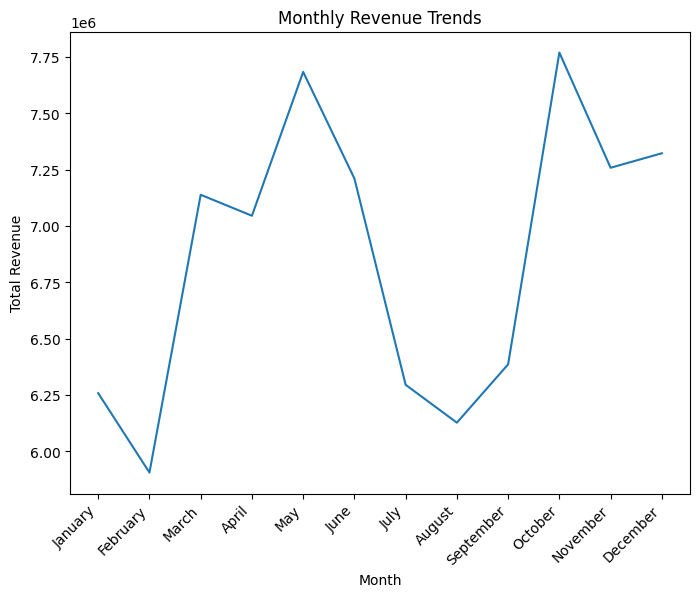

In [44]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trends')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [45]:
# Calculate proportion of each quarter
# defining Quaters
quarters = {
    'Q1': ['January', 'February', 'March'],
    'Q2': ['April', 'May', 'June'],
    'Q3': ['July', 'August', 'September'],
    'Q4': ['October', 'November', 'December']
}

In [46]:
quarter_revenue = {}
total_revenue = monthly_revenue.sum()  # Total revenue for the year

for quarter, months in quarters.items():
    quarter_revenue[quarter] = monthly_revenue[months].sum() / total_revenue

# Display the proportions
for quarter, proportion in quarter_revenue.items():
    print(f"{quarter}: {proportion:.2f}")

Q1: 0.23
Q2: 0.27
Q3: 0.23
Q4: 0.27


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [51]:
# Show how trip fare is affected by distance
# filtering out the zero trip distance value.
nonzero_df = df[df['trip_distance'] != 0]
nonzero_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,pickup_day,pick_up_month
0,2,2023-10-31 22:24:59,2023-10-31 22:35:21,3.0,1.35,1.0,170,230,1,10.7,...,3.14,0.00,1.0,18.84,2.5,0.00,2023-10-31,22,Tuesday,October
1,2,2023-10-31 23:59:41,2023-11-01 00:13:51,1.0,4.49,1.0,48,24,1,21.2,...,2.00,0.00,1.0,28.20,2.5,0.00,2023-10-31,23,Tuesday,October
2,1,2023-11-01 16:04:55,2023-11-01 16:08:37,1.0,0.60,1.0,142,239,1,5.8,...,2.00,0.00,1.0,14.30,2.5,0.00,2023-11-01,16,Wednesday,November
3,2,2023-11-01 16:57:12,2023-11-01 18:18:17,2.0,18.93,2.0,132,230,1,70.0,...,10.00,6.94,1.0,97.69,2.5,1.75,2023-11-01,16,Wednesday,November
4,2,2023-11-01 19:51:16,2023-11-01 19:54:26,1.0,0.84,1.0,142,237,1,6.5,...,3.90,0.00,1.0,16.90,2.5,0.00,2023-11-01,19,Wednesday,November


In [54]:
(nonzero_df.trip_distance<0).sum()

0

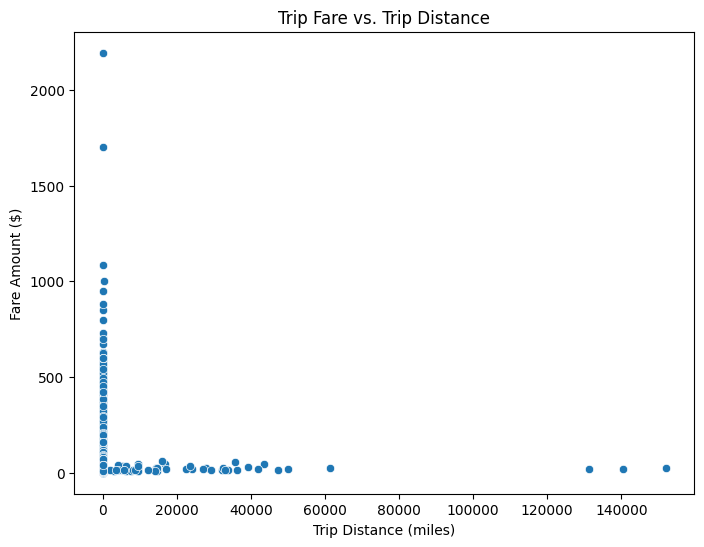

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=nonzero_df)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Fare vs. Trip Distance')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [56]:
# Show relationship between fare and trip duration

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])  # Ensure datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])  # Ensure datetime format
#creating a new column for trip duration.
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # Duration in minutes



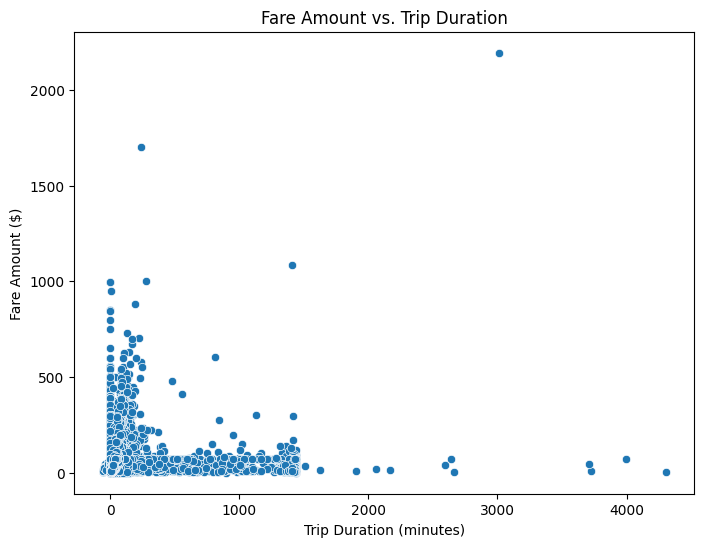

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs. Trip Duration')
plt.show()

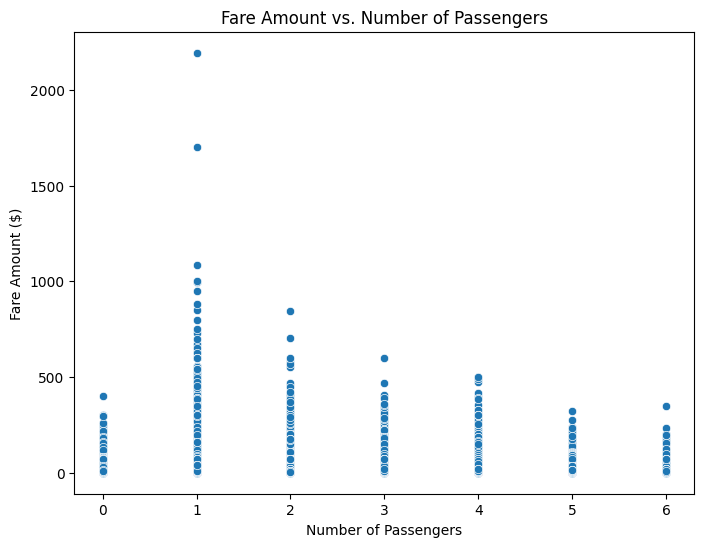

In [60]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs. Number of Passengers')
plt.show()


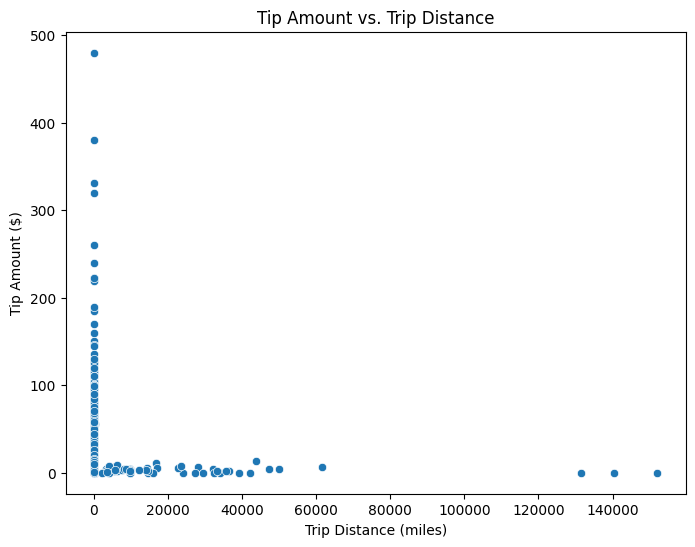

In [59]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title('Tip Amount vs. Trip Distance')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [61]:
# Analyse the distribution of different payment types (payment_type).

payment_type_counts = df['payment_type'].value_counts()
print(payment_type_counts)


payment_type
1    2240838
2     476130
0      93621
4      20503
3      13390
Name: count, dtype: int64


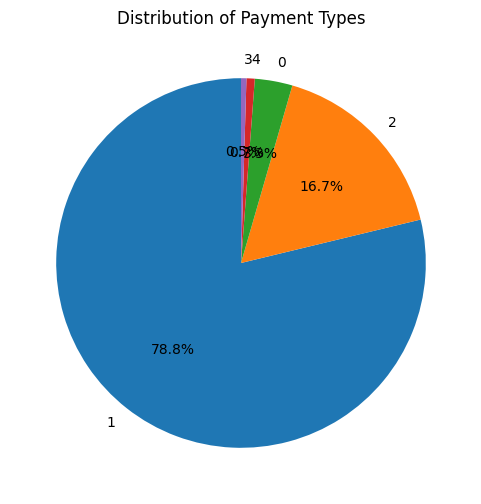

In [62]:
plt.figure(figsize=(6, 6))
payment_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Types')
plt.ylabel('')  # Remove y-axis label
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [71]:
!pip install geopandas
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.8 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [75]:
# import geopandas as gpd
import os
import geopandas as gpd


# Assuming your shapefile is in the 'taxi_zones' folder
shapefile_path = 'taxi_zones/taxi_zones.shp'

# Set the SHAPE_RESTORE_SHX config option to YES before reading the file
#gpd.io.file.fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'rw'
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Now read the shapefile
zones = gpd.read_file(shapefile_path)

# Display the GeoDataFrame
zones.head()

,geometry
0,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,"POLYGON ((935843.31 144283.336, 936046.565 144..."


No charts were generated by quickchart


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
# print(zones.info())
# zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID



**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [77]:
# Group data by location and calculate the number of trips




**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [78]:
# Find routes which have the slowest speeds at different times of the day

# Calculate trip duration in minutes
df['trip_duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Calculate speed in miles per minute
df['speed_mph'] = df['trip_distance'] / (df['trip_duration_minutes'] / 60)  # Convert to miles per hour

In [82]:
# Group by route and hour, calculate average speed
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
route_speeds = df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed_mph'].mean().reset_index()


# Find slowest routes for each hour (example: bottom 5 routes)
slowest_routes_by_hour = route_speeds.groupby('pickup_hour').apply(lambda x: x.nsmallest(5, 'speed_mph')).reset_index(drop=True)

# Display the results
print("Slowest Routes by Hour of the Day:")
print(slowest_routes_by_hour)

Slowest Routes by Hour of the Day:
     PULocationID  DOLocationID  pickup_hour  speed_mph
0             265            35            0   -42480.0
1             265           144            0     -774.0
2               1             1            0        0.0
3               4            42            0        0.0
4               4           116            0        0.0
..            ...           ...          ...        ...
115           265             9           23    -7068.0
116             1             1           23        0.0
117             4           166           23        0.0
118             7            23           23        0.0
119             7           258           23        0.0

[120 rows x 4 columns]


:How does identifying high-traffic, high-demand routes help us?

In summary, recognizing high-traffic, high-demand routes empowers taxi companies to make data-driven decisions, optimize their operations, and enhance the overall experience for both drivers and passengers, leading to a more efficient and profitable business.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [83]:
# Visualise the number of trips per hour and find the busiest hour

#extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour and count trips
trips_per_hour = df.groupby('pickup_hour')['pickup_hour'].count()

# Display the results
print("Trips per Hour:")
print(trips_per_hour)

Trips per Hour:
pickup_hour
0      82784
1      56079
2      36282
3      23801
4      16156
5      16629
6      38858
7      79719
8     108663
9     120592
10    130595
11    142470
12    157020
13    164701
14    174905
15    178270
16    176804
17    192256
18    197949
19    178507
20    156620
21    154940
22    144999
23    114883
Name: pickup_hour, dtype: int64


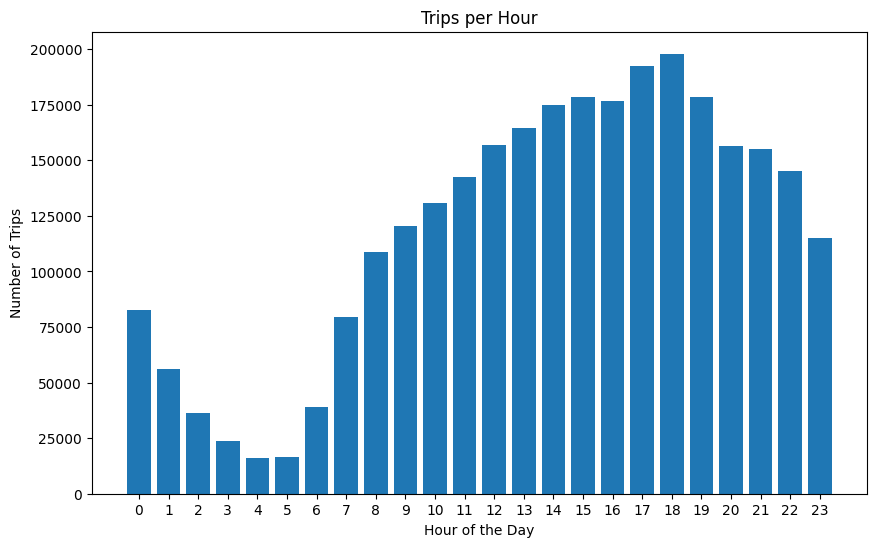

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(trips_per_hour.index, trips_per_hour.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour")
plt.xticks(range(24))  # Set x-axis ticks to represent hours
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [85]:



# Sort trips per hour in descending order
sorted_trips_per_hour = trips_per_hour.sort_values(ascending=False)

# Get the top 5 busiest hours
top_5_hours = sorted_trips_per_hour.head(5)

# Display the top 5 hours and their trip counts
print("Top 5 Busiest Hours:")
print(top_5_hours)

# Scale up the number of trips
# Assuming you sampled 7.5% of the data (frac=0.075)
sampling_fraction = 0.075

# Scale up the trip counts for the top 5 hours
actual_trips_top_5 = top_5_hours / sampling_fraction

# Display the estimated actual trip counts for the top 5 hours
print("\nEstimated Actual Trip Counts for Top 5 Busiest Hours:")
print(actual_trips_top_5)
# Fill in the value of your sampling fraction and use that to scale up the numbers




Top 5 Busiest Hours:
pickup_hour
18    197949
17    192256
19    178507
15    178270
16    176804
Name: pickup_hour, dtype: int64

Estimated Actual Trip Counts for Top 5 Busiest Hours:
pickup_hour
18    2.639320e+06
17    2.563413e+06
19    2.380093e+06
15    2.376933e+06
16    2.357387e+06
Name: pickup_hour, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [87]:
# Compare traffic trends for the week days and weekends

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
weekday_weekend_trends = df.groupby(['day_of_week', 'pickup_hour'])['pickup_hour'].count().reset_index(name='trip_count')


weekdays = weekday_weekend_trends[weekday_weekend_trends['day_of_week'].isin(range(0, 5))]
weekends = weekday_weekend_trends[weekday_weekend_trends['day_of_week'].isin(range(5, 7))]

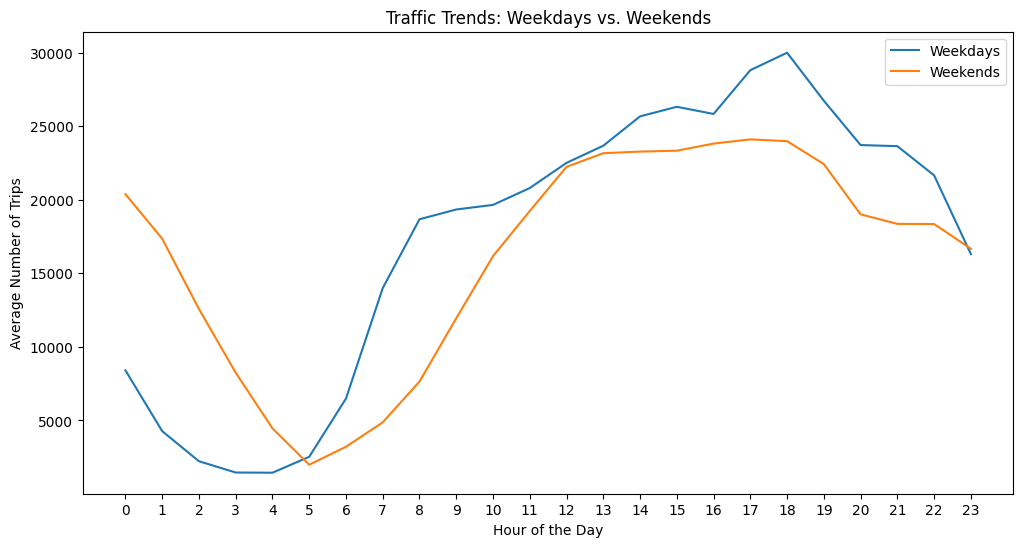

In [88]:
plt.figure(figsize=(12, 6))

# Weekdays
plt.plot(weekdays.groupby('pickup_hour')['trip_count'].mean().index,
         weekdays.groupby('pickup_hour')['trip_count'].mean().values,
         label='Weekdays')

# Weekends
plt.plot(weekends.groupby('pickup_hour')['trip_count'].mean().index,
         weekends.groupby('pickup_hour')['trip_count'].mean().values,
         label='Weekends')

plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Trips")
plt.title("Traffic Trends: Weekdays vs. Weekends")
plt.xticks(range(24))
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**Weekday Rush Hours:** Weekdays show a distinct peak in taxi demand during the morning and evening rush hours. This aligns with typical commute patterns in a major city like NYC, where people rely on taxis to get to and from work or other daily activities.

**Weekend Evenings: **Weekends exhibit a surge in taxi demand during the evening hours, likely driven by social activities, nightlife, and entertainment events. This suggests that people are more likely to use taxis for leisure and outings during weekends.

**Weekday Lulls:** Taxi demand tends to dip during the midday hours on weekdays, indicating a period of lower activity as people are generally at work or school.

**Weekend Mornings**: Weekends experience a slower start in the morning, with taxi demand picking up gradually as the day progresses. This reflects a more relaxed pace of life on weekends.



looking up for the busy and quiet hour will help to place the cabs at the proper time at proper zone where there is demand and there is less idle hors.
it will also help the taxi companies to use dynamic rate card where they can include the extras as per the demand of the taxies.
the company can predict high demand times and location and deployment more taxies making it easier to hire a taxi making a very perfect customer expeierince by reduing the wait time.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [89]:
# Find top 10 pickup and dropoff zones

#top 10 pickup zones
top_pickup_zones = df['PULocationID'].value_counts().nlargest(10) #nlarge methoda gives the top vales
print("Top 10 Pickup Zones:")
print(top_pickup_zones)

Top 10 Pickup Zones:
PULocationID
132    146376
237    133500
161    131270
236    119221
162    100684
186     96724
138     96698
142     93744
230     93686
170     83855
Name: count, dtype: int64


In [90]:
#top 10 dropoff zones
top_dropoff_zones = df['DOLocationID'].value_counts().nlargest(10) #nlarge method give top values
print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)


Top 10 Dropoff Zones:
DOLocationID
236    124978
237    119542
161    110834
230     87295
170     84077
162     80782
142     79908
239     78623
141     74563
68      71783
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [91]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Group by location ID and count pickups and dropoffs
location_counts = df.groupby('PULocationID')['PULocationID'].count().reset_index(name='pickup_count')
location_counts = location_counts.merge(df.groupby('DOLocationID')['DOLocationID'].count().reset_index(name='dropoff_count'),
                                       left_on='PULocationID', right_on='DOLocationID', how='left')

# Calculate pickup/dropoff ratio
location_counts['pickup_dropoff_ratio'] = location_counts['pickup_count'] / location_counts['dropoff_count'].fillna(1)  # Handle potential division by zero


In [92]:
# Find top 10 pickup/dropoff ratios
top_10_ratios = location_counts.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Find bottom 10 pickup/dropoff ratios
bottom_10_ratios = location_counts.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display the results
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios[['PULocationID', 'pickup_dropoff_ratio']])

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios[['PULocationID', 'pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:
     PULocationID  pickup_dropoff_ratio
69             70              7.770352
126           132              4.198726
192           199              4.000000
132           138              2.629664
179           186              1.553375
108           114              1.378754
42             43              1.363191
242           249              1.350846
156           162              1.246367
98            100              1.203670

Bottom 10 Pickup/Dropoff Ratios:
     PULocationID  pickup_dropoff_ratio
109           115              0.025000
26             27              0.036364
94             96              0.042553
0               1              0.043523
57             58              0.046512
63             64              0.051913
104           109              0.052632
56             57              0.055556
250           257              0.062230
193           200              0.067427


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [93]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter Data:
nt_trips = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]
dt_trips = df[(df['tpep_pickup_datetime'].dt.hour >= 5) & (df['tpep_pickup_datetime'].dt.hour < 23)]

top_pickup_zones = df['PULocationID'].value_counts().nlargest(10)
print("Top 10 Pickup Zones during Night Hours:")
print(top_pickup_zones)

Top 10 Pickup Zones during Night Hours:
PULocationID
132    146376
237    133500
161    131270
236    119221
162    100684
186     96724
138     96698
142     93744
230     93686
170     83855
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [94]:
# Filter for night hours (11 PM to 5 AM)


# Calculate Total Revenue:
nt_revenue = nt_trips['total_amount'].sum()
dt_revenue = dt_trips['total_amount'].sum()

# Calculate Revenue Share:
total_revenue = df['total_amount'].sum()
nt_share = nt_revenue / total_revenue
dt_share = dt_revenue / total_revenue

# Display the results:
print(f"Nighttime Revenue Share: {nt_share:.2f}")
print(f"Daytime Revenue Share: {dt_share:.2f}")

Nighttime Revenue Share: 0.12
Daytime Revenue Share: 0.88


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [123]:
# Analyse the fare per mile per passenger for different passenger counts


#  Calculate Fare per Mile:
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

#  Calculate Fare per Mile per Passenger:
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']

# Group by Passenger Count:
fare_by_passenger_count = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Display the results:
print("Average Fare per Mile per Passenger for Different Passenger Counts:")
print(fare_by_passenger_count)

Average Fare per Mile per Passenger for Different Passenger Counts:
passenger_count
0.0    inf
1.0    inf
2.0    inf
3.0    inf
4.0    inf
5.0    inf
6.0    inf
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [96]:
# Compare the average fare per mile for different days and for different times of the day

#  Calculate Fare per Mile:
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group by Day of the Week:
fare_by_day = df.groupby(df['tpep_pickup_datetime'].dt.day_name())['fare_per_mile'].mean()
print("Average Fare per Mile by Day of the Week:")
print(fare_by_day)


Average Fare per Mile by Day of the Week:
tpep_pickup_datetime
Friday       inf
Monday       inf
Saturday     inf
Sunday       inf
Thursday     inf
Tuesday      inf
Wednesday    inf
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [97]:
# Compare fare per mile for different vendors

#Group by Vendor and calculate average fare per mile:
fare_by_vendor = df.groupby('VendorID')['fare_per_mile'].mean()

# Display the results:
print("Average Fare per Mile for Different Vendors:")
print(fare_by_vendor)

Average Fare per Mile for Different Vendors:
VendorID
1         inf
2         inf
6    6.832511
Name: fare_per_mile, dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [99]:
# Defining distance tiers

df['distance_tier'] = pd.cut(df['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Short', 'Medium', 'Long'])

In [100]:
#Analyzing Fare per Mile by Vendor and Tier:

# Group by vendor and distance tier, then calculate average fare per mile
fare_by_vendor_tier = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

#  the results
print("Average Fare per Mile by Vendor and Distance Tier:")
print(fare_by_vendor_tier)



Average Fare per Mile by Vendor and Distance Tier:
   VendorID distance_tier  fare_per_mile
0         1         Short       9.940908
1         1        Medium       6.387433
2         1          Long       4.427908
3         2         Short      17.827495
4         2        Medium       6.540752
5         2          Long       4.492938
6         6         Short      32.308362
7         6        Medium       8.308918
8         6          Long       4.404028


In [124]:
# Filter data for Medium and Long distance tiers
medium_tier_data = df[df['distance_tier'] == 'Medium']
long_tier_data = df[df['distance_tier'] == 'Long']

# Calculate average fare per mile for each tier
avg_fare_medium = medium_tier_data['fare_per_mile'].mean()
avg_fare_long = long_tier_data['fare_per_mile'].mean()

# Display the results
print("Average Fare per Mile for Distances from 2 to 5 miles:", avg_fare_medium)
print("Average Fare per Mile for Distances more than 5 miles:", avg_fare_long)

Average Fare per Mile for Distances from 2 to 5 miles: 6.503169804972502
Average Fare per Mile for Distances more than 5 miles: 4.477869198214971


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [102]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100


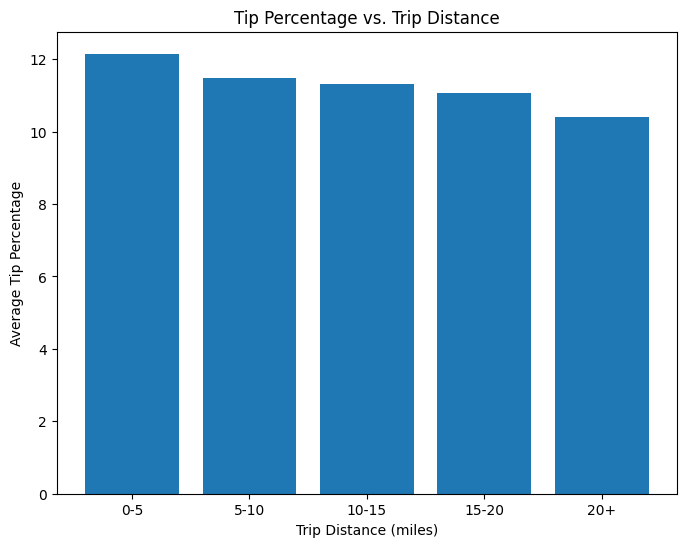

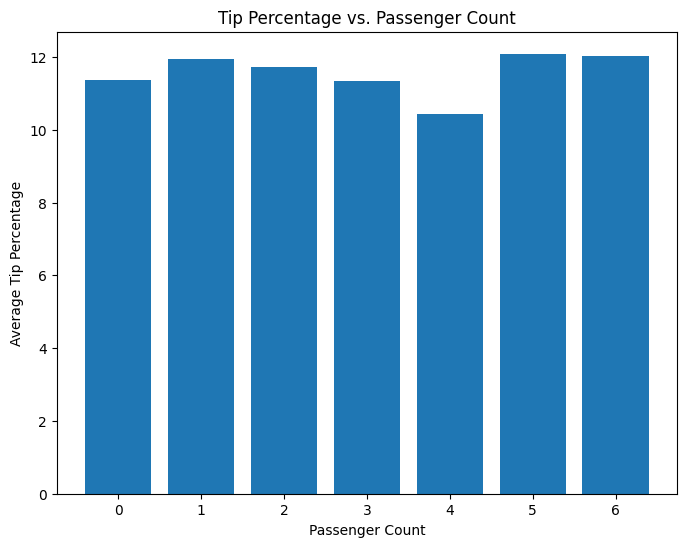

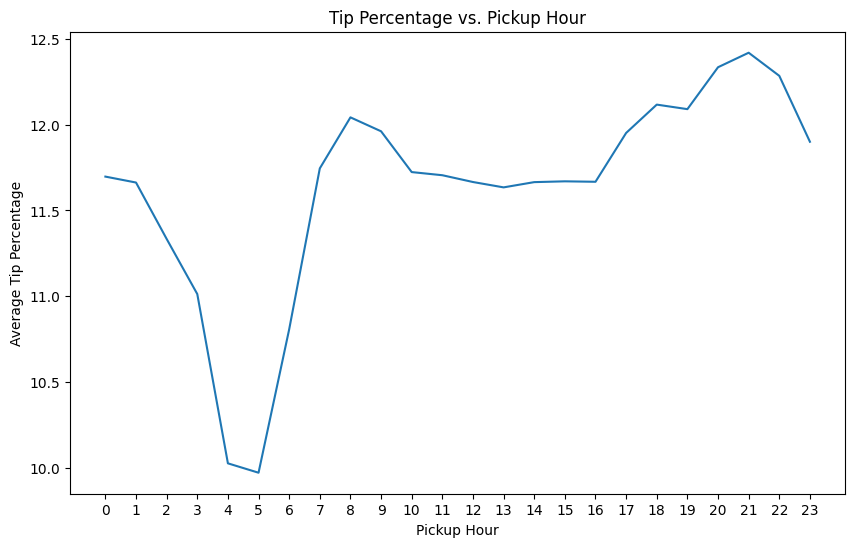

In [104]:
distance_bins = pd.cut(df['trip_distance'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
tip_by_distance = df.groupby(distance_bins)['tip_percentage'].mean()

# Visualize the trend (e.g., using a bar plot)
plt.figure(figsize=(8, 6))
plt.bar(tip_by_distance.index, tip_by_distance.values)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage vs. Trip Distance")
plt.show()


# Group by passenger count and calculate average tip percentage
tip_by_passengers = df.groupby('passenger_count')['tip_percentage'].mean()

# Visualize the trend (e.g., using a bar plot)
plt.figure(figsize=(8, 6))
plt.bar(tip_by_passengers.index, tip_by_passengers.values)
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage vs. Passenger Count")
plt.show()

# Group by pickup hour and calculate average tip percentage
tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean()

# Visualize the trend (e.g., using a line plot)
plt.figure(figsize=(10, 6))
plt.plot(tip_by_hour.index, tip_by_hour.values)
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage vs. Pickup Hour")
plt.xticks(range(24))
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [109]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100
df['tip_percentage_group'] = pd.cut(df['tip_percentage'], bins=[0, 10, 25, 100], labels=['Low', 'Medium', 'High'])

# Filter trips with tip percentage < 10%
low_tip_trips = df[df['tip_percentage'] < 10]

# Filter trips with tip percentage > 25%
high_tip_trips = df[df['tip_percentage'] > 25]

# Compare the two groups (e.g., by average trip distance, fare amount, etc.)
print("Low Tip Trips (Tip Percentage < 10%):")
print(low_tip_trips[['trip_distance', 'fare_amount', 'total_amount']].describe())

print("\nHigh Tip Trips (Tip Percentage > 25%):")
print(high_tip_trips[['trip_distance', 'fare_amount', 'total_amount']].describe())


Low Tip Trips (Tip Percentage < 10%):
       trip_distance    fare_amount   total_amount
count  977080.000000  977080.000000  977080.000000
mean        4.415501      20.796024      26.768510
std       271.200153      20.649818      22.731756
min         0.000000       0.000000       0.750000
25%         0.980000       9.300000      14.300000
50%         1.760000      14.200000      19.420000
75%         3.570000      23.300000      29.000000
max    152136.300000    2194.700000    2203.140000

High Tip Trips (Tip Percentage > 25%):
       trip_distance   fare_amount  total_amount
count   14442.000000  14442.000000  14442.000000
mean        2.227424     13.867419     30.752204
std         3.686670     14.533931     27.549100
min         0.000000      0.000000      0.010000
25%         0.600000      6.500000     16.200000
50%         1.100000      9.300000     21.000000
75%         2.190000     15.600000     33.500000
max       127.790000    204.600000    500.000000


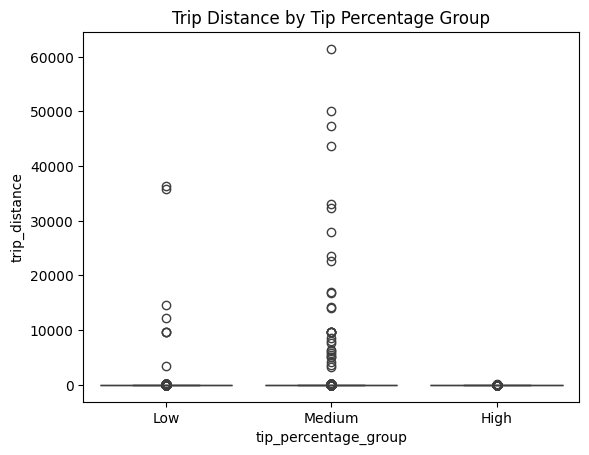

In [110]:

# Box plot of trip distance
sns.boxplot(x='tip_percentage_group', y='trip_distance', data=df)
plt.title('Trip Distance by Tip Percentage Group')
plt.show()


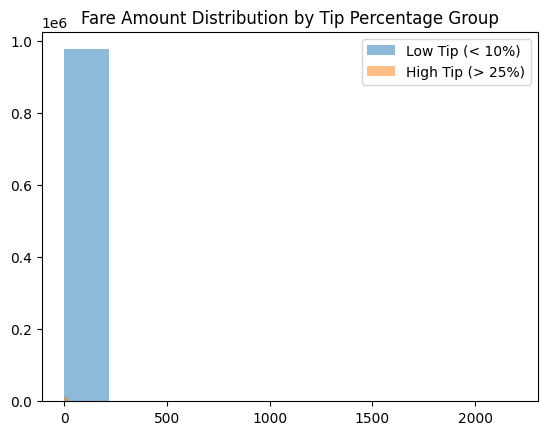

In [111]:

# Histogram of fare amount
plt.hist(low_tip_trips['fare_amount'], alpha=0.5, label='Low Tip (< 10%)')
plt.hist(high_tip_trips['fare_amount'], alpha=0.5, label='High Tip (> 25%)')
plt.title('Fare Amount Distribution by Tip Percentage Group')
plt.legend()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [112]:
# See how passenger count varies across hours and days

# Group by hour and day, calculate average passenger count
passenger_count_variation = df.groupby(['pickup_hour', 'day_of_week'])['passenger_count'].mean().reset_index(name='avg_passengers')


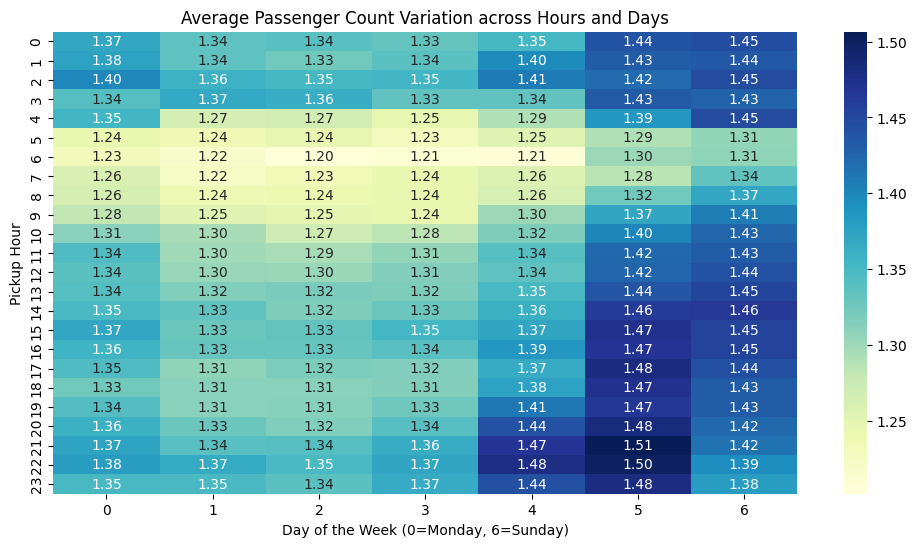

In [114]:
# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_count_variation.pivot(index='pickup_hour', columns='day_of_week', values='avg_passengers'),
            cmap="YlGnBu", annot=True, fmt=".2f")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Pickup Hour")
plt.title("Average Passenger Count Variation across Hours and Days")
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [115]:
# How does passenger count vary across zones
# Group by pickup zone and calculate average passenger count
passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index(name='avg_passengers')


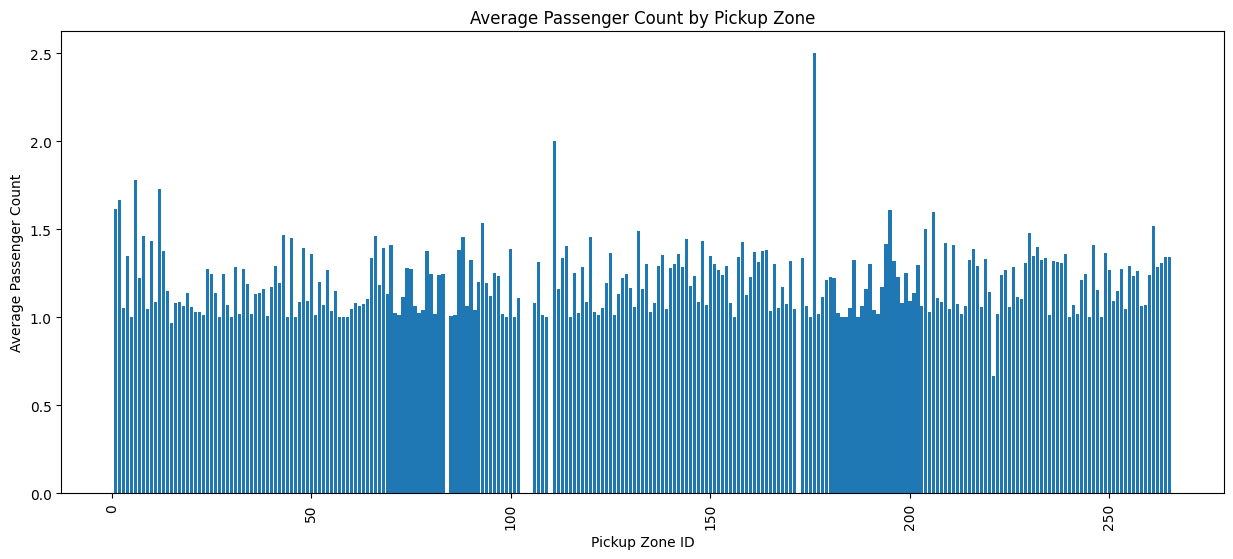

In [116]:
# Create a bar plot showing average passenger count for each zone
plt.figure(figsize=(15, 6))  # Adjust figure size as needed
plt.bar(passenger_count_by_zone['PULocationID'], passenger_count_by_zone['avg_passengers'])
plt.xlabel("Pickup Zone ID")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Pickup Zone")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

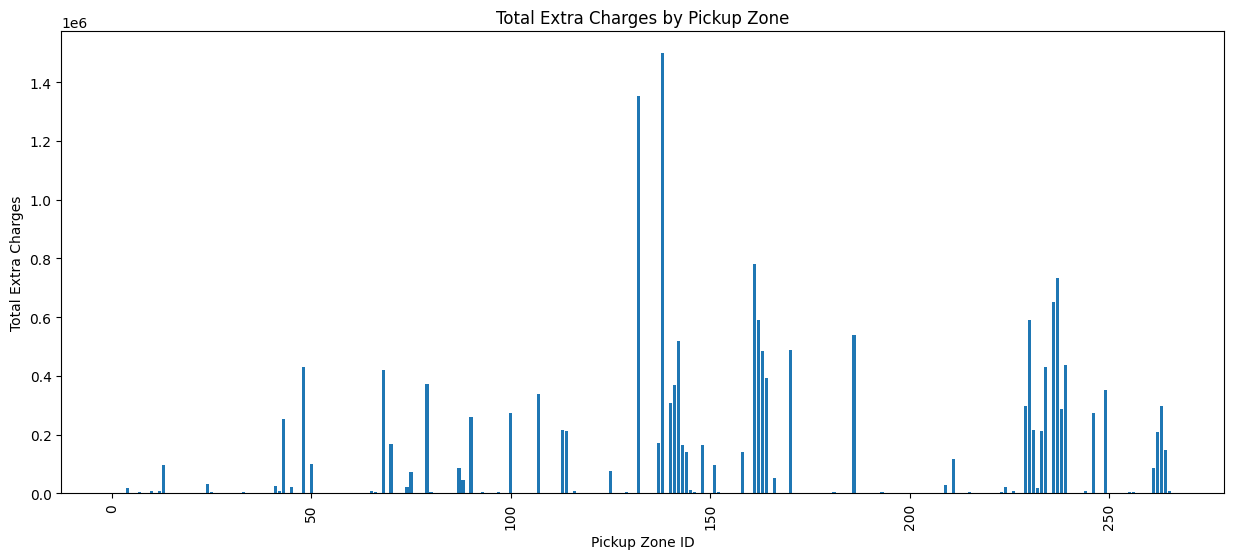

In [119]:
# How often is each surcharge applied?

# Group by pickup zone and calculate total extra charges
extra_charges_by_zone = df.groupby('PULocationID')[['extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge', 'Airport_fee']].sum().reset_index()
extra_charges_by_zone['total_extra_charges'] = extra_charges_by_zone[['extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge', 'Airport_fee']].sum(axis=1)

# Create a bar plot (adjust figure size as needed)
plt.figure(figsize=(15, 6))
plt.bar(extra_charges_by_zone['PULocationID'], extra_charges_by_zone['total_extra_charges'])
plt.xlabel("Pickup Zone ID")
plt.ylabel("Total Extra Charges")
plt.title("Total Extra Charges by Pickup Zone")
plt.xticks(rotation=90)
plt.show()

# Create a choropleth map (assuming you have the 'zones' GeoDataFrame)



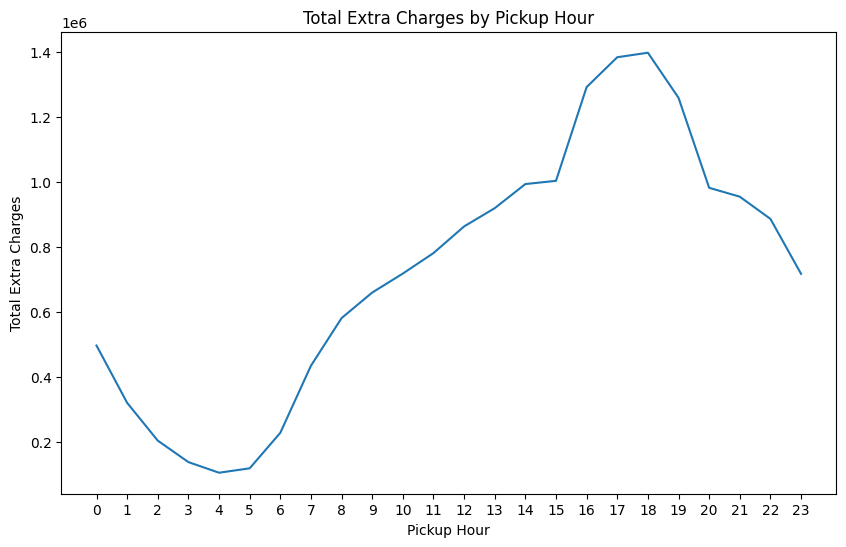

In [121]:
# Group by pickup hour and calculate total extra charges
extra_charges_by_hour = df.groupby('pickup_hour')[['extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge', 'Airport_fee']].sum().reset_index()
extra_charges_by_hour['total_extra_charges'] = extra_charges_by_hour[['extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge', 'Airport_fee']].sum(axis=1)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(extra_charges_by_hour['pickup_hour'], extra_charges_by_hour['total_extra_charges'])
plt.xlabel("Pickup Hour")
plt.ylabel("Total Extra Charges")
plt.title("Total Extra Charges by Pickup Hour")
plt.xticks(range(24))
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies



1. Address Operational Inefficiencies:
**Slow Routes: ** need to identify slow routes and figure a way to avoid these routes.
**High-Traffic Zones:** need to optimzie usage of alorithum to make sure the taxis are properly routed through high traffic zone.
Pickup/Dropoff Imbalances: to reduce the Pickup dropoff imbalance by startigically placing the tai in the high pickup zones.
2. Optimize Dispatching Based on Demand:
Peak Hours: Increase the number of taxis available during peak hours to meet the higher demand. This could involve adjusting driver shift schedules or implementing surge pricing to incentivize drivers to work during those times.

Zone-Specific Strategies: Implement zone-specific dispatching strategies based on the identified demand patterns. For example, prioritize dispatching taxis to zones with high pickup demand during specific hours or days.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Hourly Peaks**: During the busiest hours (16-18hrs), strategically position more cabs in high-demand zones (identified in 3.2.5). These could include popular pickup locations like airports, business districts, and entertainment areas.

**Hourly Lulls**: During off-peak hours ( 4-5hrs), reduce the number of cabs in less active zones to minimize idle time. Encourage drivers to reposition to areas with anticipated demand increases based on upcoming events or predictable shift changes.

**Day-of-Week Variations**: Increase cab density in areas with high demand on specific days. For example, focus on business districts during weekdays and entertainment hubs during weekends.

**Monthly Trends:** Analyze monthly trends to anticipate fluctuations in demand. During peak months, ensure higher cab availability in popular areas. During slower months, consider strategies to incentivize drivers to remain active or adjust fleet size accordingly.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Dynamic Pricing:
Demand-Based Adjustments: Implement dynamic pricing models that adjust fares based on real-time demand and supply.
2. Competitive Pricing Analysis:
Monitor Competitors: Continuously monitor the pricing strategies of other transportation vendors, such as ride-hailing services, to ensure that taxi fares remain competitive.
Route Optimization: Encourage drivers to utilize navigation apps or dispatching software that provides optimal routes to minimize travel times and fuel costs. This can help reduce operating expenses and potentially allow for lower fares while maintaining profitability.
Idle Time Reduction: Implement strategies to reduce driver idle time, such as repositioning taxis to high-demand zones during off-peak hours or offering incentives for completing trips to areas with low taxi availability. This can improve driver utilization and potentially allow for lower fares without impacting driver earnings.
4. Customer Segmentation and Promotions:
Loyalty Programs: Implement loyalty programs to reward frequent taxi riders with discounts or exclusive benefits. This can help retain existing customers and incentivize repeat business.
Targeted Promotions: Offer targeted promotions or discounts for specific trip types or passenger segments, such as airport trips, business travelers, or students. This can help attract new customers and increase ridership during specific times or in specific zones.
Bundled Services: Consider offering bundled services, such as pre-booked airport transfers or corporate accounts, at discounted rates to incentivize larger volume bookings.
5. Data-Driven Evaluation:
Monitor Key Metrics: Continuously monitor key metrics, such as average fare, trip volume, passenger wait times, and driver earnings, to assess the impact of pricing adjustments. This data-driven approach allows for ongoing evaluation and fine-tuning of the pricing strategy to maximize revenue and maintain competitiveness.
A/B Testing: Conduct A/B testing to compare the effectiveness of different pricing strategies in specific zones or time periods. This can help identify the optimal pricing approach for different market segments and demand patterns.
Feedback Mechanisms: Establish feedback mechanisms for passengers and drivers to gather insights and understand their perspectives on pricing and service quality. This valuable feedback can inform future pricing adjustments and service improvements.
Key Considerations:
Transparency: Maintain transparency with passengers regarding pricing adjustments and surge pricing to avoid negative perceptions or surprises. Clearly communicate the factors that influence fare calculations.
Regulatory Compliance: Ensure that all pricing strategies comply with relevant regulations and guidelines set by the NYC Taxi and Limousine Commission (TLC).
Driver Collaboration: Involve drivers in the pricing strategy discussions and consider their feedback to ensure that fare adjustments are fair and incentivize them to provide quality service.
By implementing these data-driven pricing adjustments, taxi companies can optimize their fares to maximize revenue while maintaining competitive rates with other transportation vendors. This strategic approach can contribute to the long-term success and sustainability of the taxi industry in NYC.